# Задание 1

In [2]:
# Вариант 5

x = [-2, 0, 2,  3]
y = [-2, 0, -1, 1]

def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + y ** 2 + 1)

def q_sum(z):
    return sum(z)


def exchange_scheme(olx_x, old_y, sorted_id):
    x = y = [0 for _ in range(4)]

    x[2] = x[3] = olx_x[sorted_id[2]]

    x[0] = olx_x[sorted_id[0]]
    x[1] = olx_x[sorted_id[1]]

    y[0] = y[1] = old_y[sorted_id[2]]

    y[2] = old_y[sorted_id[0]]
    y[3] = old_y[sorted_id[1]]

    return x, y


def sorting(z):
    sorted_id = sorted(range(len(z)), key=lambda k: z[k])
    return sorted_id


def evo_step(x, y, z):
    _, min_id = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x, y, z


def evo_steps(x, y, step_num = 4):
    res = []
    for i in range(step_num):
        arr_z = [qZ(x, y[i]) for i, x in enumerate(x)]
        x, y, z = evo_step(x, y, arr_z)
        x, y = exchange_scheme(x, y, sorting(z))
        res.append([x, y, q_sum(arr_z), arr_z])
    return x, y, res



def main():
    res = evo_steps(x, y)
    q_arr_z = []
    for i in range(len(res[2])):
        print(f'max_{i + 1}_step: {res[2][i][2]}')
        q_arr_z += res[2][i][3]
    print(f'max z: {max(q_arr_z)}')


if __name__ == '__main__':
    main()

max_1_step: 1.757171834250942
max_2_step: 2.8941176470588235
max_3_step: 3.6
max_4_step: 4.0
max z: 1.0


# Задание 2

Лучший маршрут: [1, 5, 3, 4, 6, 2, 1]
Длина: 140
Длины всех рассмотренных маршрутов: [141, 128, 140, 166, 155]


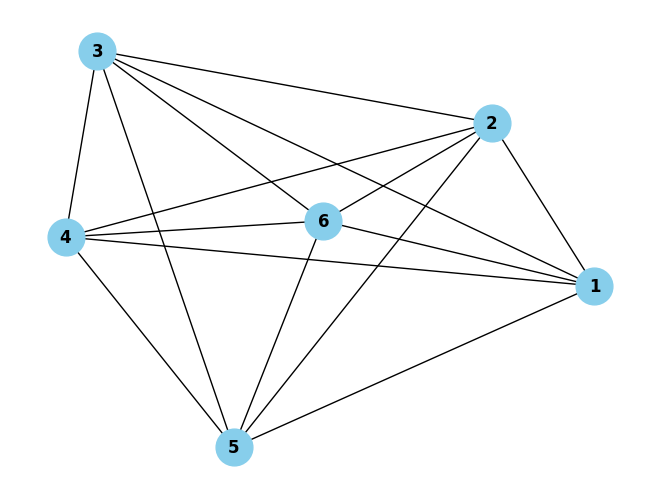

In [24]:
import networkx as nx
from math import e

# Вариант 5
distances = [
    (1, 2, 18), (1, 3, 41), (1, 4, 36), (1, 5, 29), (1, 6, 19),
    (2, 3, 27), (2, 4, 31), (2, 5, 37), (2, 6, 15), (3, 4, 19),
    (3, 5, 42), (3, 6, 23), (4, 5, 24), (4, 6, 17), (5, 6, 24)
]

V = [1, 3, 4, 5, 6, 2, 1]
P = [63, 49, 45, 53]
Z = [(2, 4), (3, 4), (4, 6), (5, 6)]
T = 100


def probability(delta, T):
    return 100 * e ** (-delta / T)

def reduct_temp(prev_t):
    next_t = 0.5 * prev_t
    return next_t

def edge_length(i, j, distances, round_trip=True):
    if round_trip:
        return max([item[2] if (item[0] == i and item[1] == j)
                               or (item[1] == i and item[0] == j) else -1
                    for item in distances])
    else:
        return max([item[2] if (item[0] == i and item[1] == j) else -1
                    for item in distances])

def route_length(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edge_length(V[i], V[i + 1], distances))

    return sum(edges)

def route_one_replacement(arr_v, z, replace_by_name=True):
    decrement = 1 if replace_by_name else 0

    arr_v[z[0] - decrement], arr_v[z[1] - decrement] = arr_v[z[1] - decrement], arr_v[z[0] - decrement]
    return arr_v

def route_replacement(V, z):
    for _z in z:
        V = route_one_replacement(V, _z)
    return V

def choose_route(distances, v, z, t, p):
    sum_length = route_length(v, distances)
    arr_sum = [sum_length]

    for i in range(len(z)):
        new_v = route_one_replacement(v[:], z[i])
        new_s = route_length(new_v, distances)
        arr_sum.append(new_s)
        delta_s = new_s - sum_length

        if delta_s > 0:
            _p = probability(delta_s, t)
            if _p > p[i]:
                v = new_v
                sum_length = new_s
        else:
            v = new_v
            sum_length = new_s

        t = reduct_temp(t)

    return v, arr_sum


graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700)

best_route, arr_length = choose_route(distances, V, Z, T, P)

print(f'Лучший маршрут: {best_route}')
print(f'Длина: {route_length(best_route, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arr_length}')


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() 
    graph.add_weighted_edges_from(newDistances) 

    nx.draw_kamada_kawai(graph, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700)


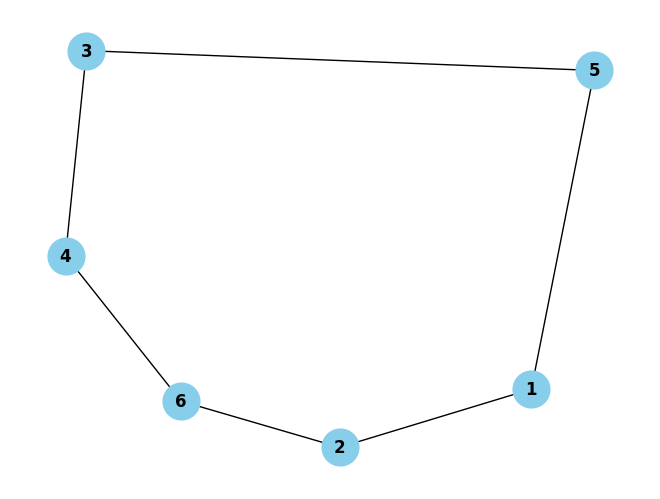

In [23]:
drawRouteGraph(distances, best_route)

# Задание 3